# Car Price Assignment

## Problem Statement
### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

#### Which variables are significant in predicting the price of a car
#### How well those variables describe the price of a car

## Business Goal 

### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
#Shape of the dataframe
carprice.shape

(205, 26)

In [5]:
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Check all features
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### There are no columns with the null values

In [7]:
#Change the display of floating point numbers to two decimal values
pd.options.display.float_format = '{:.2f}'.format

#Check statistics of numerical variables
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


### There are no columns with zero values or having same value for all rows.

In [8]:
#Extract car company from column CarName
carprice['carCompany'] = carprice['CarName'].apply(lambda x: x.split(" ")[0].upper())

carprice['carCompany'].head()

0    ALFA-ROMERO
1    ALFA-ROMERO
2    ALFA-ROMERO
3           AUDI
4           AUDI
Name: carCompany, dtype: object

In [9]:
#Unique car company names

carprice['carCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [10]:
# Correct spelling mistakes in the car company names
# MAXDA, MAZDA = MAZDA
# PORSCHE, PORCSHCE = PORSCHE
# TOYOTA, TOYOUTA = TOYOTA
# VOKSWAGEN, VOLKSWAGEN, VW = VOLKSWAGEN

carprice['carCompany'] = carprice['carCompany'].apply(lambda x: 'MAZDA' if x == 'MAXDA' 
                                                              else 'PORSCHE' if x == 'PORCSHCE'
                                                              else 'TOYOTA' if x == 'TOYOUTA' 
                                                              else 'VOLKSWAGEN' if x == 'VOKSWAGEN' or x == 'VW'
                                                              else x)

#print Unique car company names again

carprice['carCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [11]:
#Drop variable CarName as it will not be used in the analysis

carprice.drop('CarName', axis =1, inplace=True)

### Step 2: Univariate Analysis - Continuous Variables

In [12]:
# symboling - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky,
# -3 that it is probably pretty safe.(Categorical) 

carprice['symboling'].head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64

In [13]:
carprice['symboling'].describe()

count   205.00
mean      0.83
std       1.25
min      -2.00
25%       0.00
50%       1.00
75%       2.00
max       3.00
Name: symboling, dtype: float64

In [14]:
carprice['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


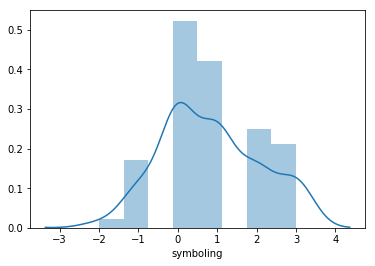

In [15]:
#plot distribution plot for column symboling

sns.distplot(carprice['symboling'])

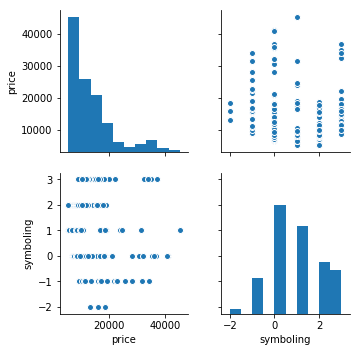

In [16]:
#draw pairplot for column symboling with price

sns.pairplot(carprice[['price','symboling']])
plt.show()

### Symboling data is not normal and we don't see any linear relationship with variable price

In [17]:
# wheelbase - Weelbase of car (Numeric)

carprice['wheelbase'].describe()

count   205.00
mean     98.76
std       6.02
min      86.60
25%      94.50
50%      97.00
75%     102.40
max     120.90
Name: wheelbase, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


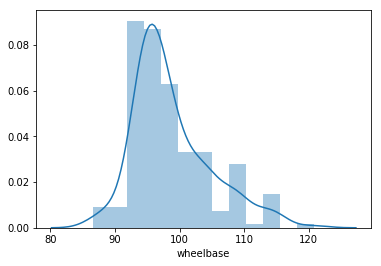

In [18]:
#plot distribution plot for column wheelbase

sns.distplot(carprice['wheelbase'])

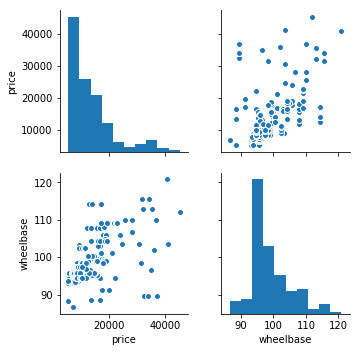

In [19]:
#draw pairplot for column wheelbase with price

sns.pairplot(carprice[['price','wheelbase']])
plt.show()

### wheelbase data has longer right arm in the distribution plot and we see high variance for the larger values in the pairplot with price variable

In [20]:
# carlength - Length of car (Numeric)

carprice['carlength'].describe()

count   205.00
mean    174.05
std      12.34
min     141.10
25%     166.30
50%     173.20
75%     183.10
max     208.10
Name: carlength, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


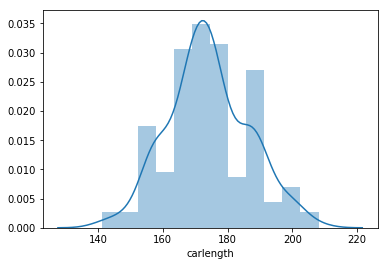

In [21]:
#plot distribution plot for column carlength

sns.distplot(carprice['carlength'])

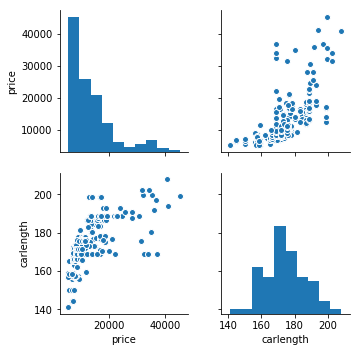

In [22]:
#draw pairplot for column carlength with price

sns.pairplot(carprice[['price','carlength']])
plt.show()

### carlength data is quite normal. We see high variance for the larger values in the pairplot with price variable

In [23]:
# carwidth - Width of car (Numeric)

carprice['carwidth'].describe()

count   205.00
mean     65.91
std       2.15
min      60.30
25%      64.10
50%      65.50
75%      66.90
max      72.30
Name: carwidth, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


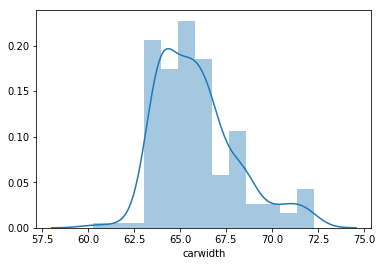

In [24]:
#plot distribution plot for column carwidth

sns.distplot(carprice['carwidth'])

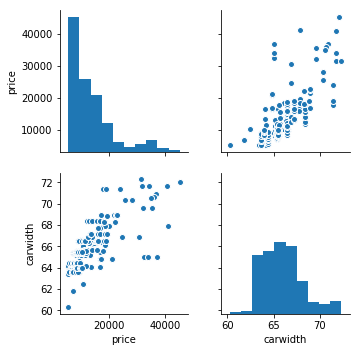

In [25]:
#draw pairplot for column carwidth with price 

sns.pairplot(carprice[['price','carwidth']])
plt.show()

### carwidth data has longer right arm in the distribution plot and we see high variance for the larger values in the pairplot with price variable

### Create a derived metric cararea = carlength * carwidth

In [26]:
carprice['cararea'] = carprice['carlength'] * carprice['carwidth']

carprice['cararea'].describe()

count     205.00
mean    11493.36
std      1156.44
min      8508.33
25%     10709.72
50%     11314.20
75%     12275.90
max     14920.77
Name: cararea, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


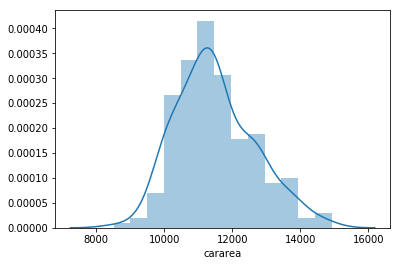

In [27]:
#plot distribution plot for derived column cararea

sns.distplot(carprice['cararea'])

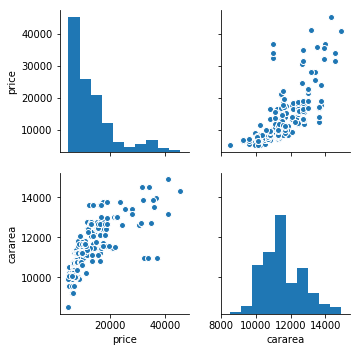

In [28]:
#draw pairplot for derived column cararea with price 

sns.pairplot(carprice[['price','cararea']])
plt.show()

### Derived metric cararea data is quite normal. We see high variance for the larger values in the pairplot with price variable

### Now drop carlength and carwidth variables as they are redundant because of the derived variable cararea 

In [29]:
carprice.drop(['carlength','carwidth'],axis=1,inplace=True)

In [30]:
# carheight - height of car (Numeric)

carprice['carheight'].describe()

count   205.00
mean     53.72
std       2.44
min      47.80
25%      52.00
50%      54.10
75%      55.50
max      59.80
Name: carheight, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


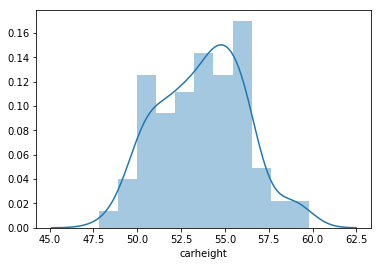

In [31]:
#plot distribution plot for column carheight

sns.distplot(carprice['carheight'])

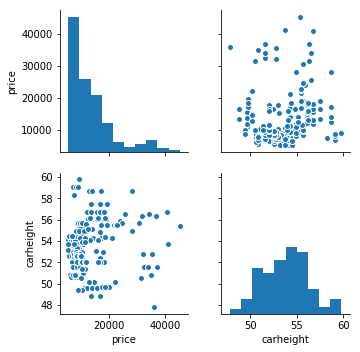

In [32]:
#draw pairplot for column carheight with price 

sns.pairplot(carprice[['price','carheight']])
plt.show()

### carheight data has longer left arm in the distribution plot and we see high variance in the pairplot with price variable (data is too scattered)

In [33]:
#curbweight: The weight of a car without occupants or baggage. (Numeric)

carprice['curbweight'].describe()

count    205.00
mean    2555.57
std      520.68
min     1488.00
25%     2145.00
50%     2414.00
75%     2935.00
max     4066.00
Name: curbweight, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


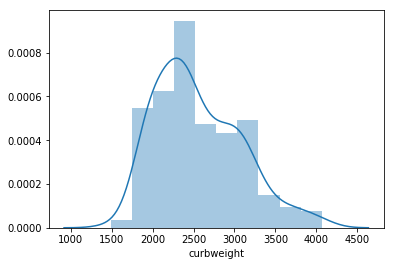

In [34]:
#plot distribution plot for column curbweight

sns.distplot(carprice['curbweight'])

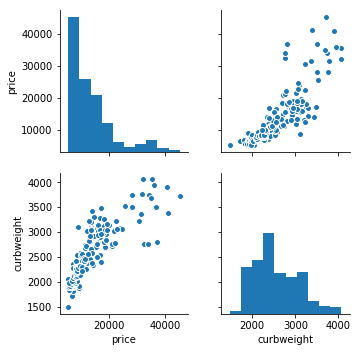

In [35]:
#draw pairplot for column curbweight with price 

sns.pairplot(carprice[['price','curbweight']])
plt.show()

### curbweight data has little longer right arm in the distribution plot and we see high variance for few larger values in the pairplot with price variable, otherwise it has a strong linear correlation with price in general

In [36]:
#enginesize: Size of car (Numeric)

carprice['enginesize'].describe()

count   205.00
mean    126.91
std      41.64
min      61.00
25%      97.00
50%     120.00
75%     141.00
max     326.00
Name: enginesize, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


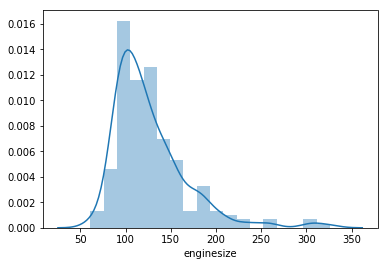

In [37]:
#plot distribution plot for column enginesize

sns.distplot(carprice['enginesize'])

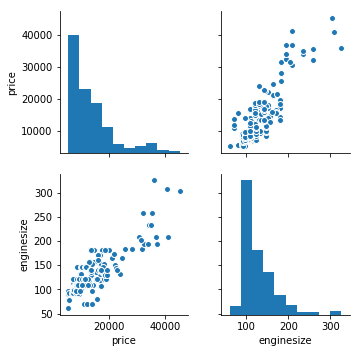

In [38]:
#draw pairplot for column enginesize with price 

sns.pairplot(carprice[['price','enginesize']])
plt.show()

### enginesize data has a longer right tail in the distribution plot and we see high variance for few larger values in the pairplot with price variable, otherwise it has a good linear correlation with price in general

In [39]:
#boreratio: Boreratio of car (Numeric)

carprice['boreratio'].describe()

count   205.00
mean      3.33
std       0.27
min       2.54
25%       3.15
50%       3.31
75%       3.58
max       3.94
Name: boreratio, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


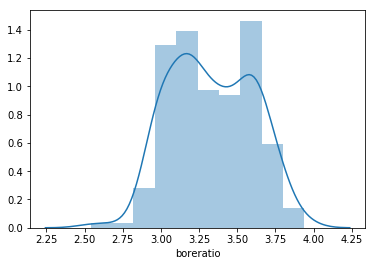

In [40]:
#plot distribution plot for column boreratio

sns.distplot(carprice['boreratio'])

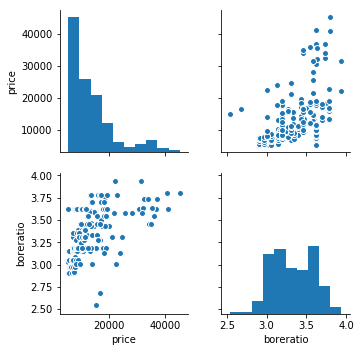

In [41]:
#draw pairplot for column boreratio with price 

sns.pairplot(carprice[['price','boreratio']])
plt.show()

### boreratio data has very broad peak in the distribution plot and we see high variance in the pairplot with price variable (data is too scattered)

In [42]:
#stroke: Stroke or volume inside the engine (Numeric)

carprice['stroke'].describe()

count   205.00
mean      3.26
std       0.31
min       2.07
25%       3.11
50%       3.29
75%       3.41
max       4.17
Name: stroke, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


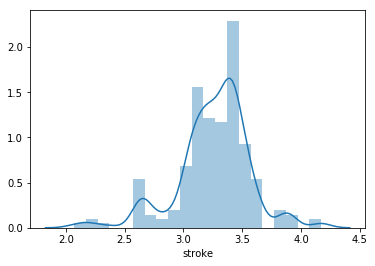

In [43]:
#plot distribution plot for column stroke

sns.distplot(carprice['stroke'])

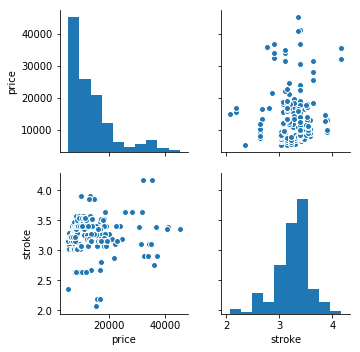

In [44]:
#draw pairplot for column stroke with price 

sns.pairplot(carprice[['price','stroke']])
plt.show()

### stroke data has long left and right tails in the distribution plot and we see high variance in the pairplot with price variable (data is too scattered)

In [45]:
#compressionratio: compression ratio of car (Numeric)

carprice['compressionratio'].describe()

count   205.00
mean     10.14
std       3.97
min       7.00
25%       8.60
50%       9.00
75%       9.40
max      23.00
Name: compressionratio, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


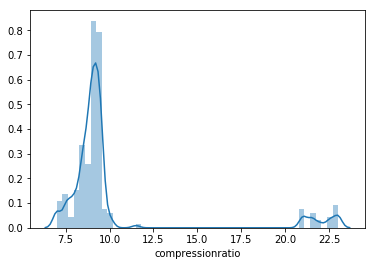

In [46]:
#plot distribution plot for column compressionratio

sns.distplot(carprice['compressionratio'])

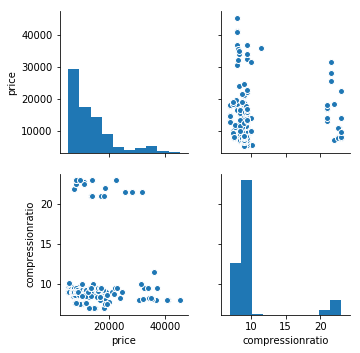

In [47]:
#draw pairplot for column compressionratio with price 

sns.pairplot(carprice[['price','compressionratio']])
plt.show()

### compressionratio data is not normal and we don't see a linear relationship with price variable

In [48]:
#horsepower: Horsepower (Numeric)

carprice['horsepower'].describe()

count   205.00
mean    104.12
std      39.54
min      48.00
25%      70.00
50%      95.00
75%     116.00
max     288.00
Name: horsepower, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


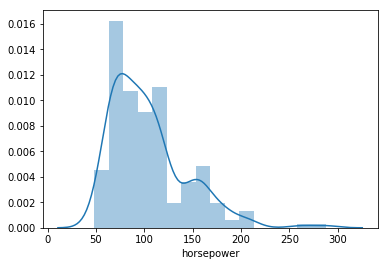

In [49]:
#plot distribution plot for column horsepower

sns.distplot(carprice['horsepower'])

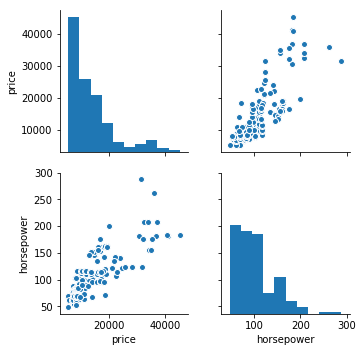

In [50]:
#draw pairplot for column horsepower with price 

sns.pairplot(carprice[['price','horsepower']])
plt.show()

### horsepower data has longer right arm in the distribution plot and we see high variance for the larger values in the pairplot with price variable

In [51]:
#peakrpm: car peak rpm (Numeric)

carprice['peakrpm'].describe()

count    205.00
mean    5125.12
std      476.99
min     4150.00
25%     4800.00
50%     5200.00
75%     5500.00
max     6600.00
Name: peakrpm, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


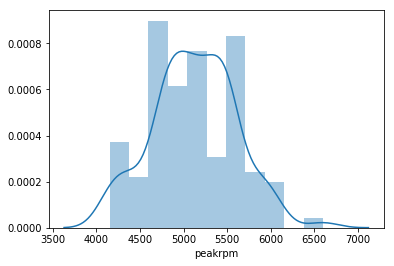

In [52]:
#plot distribution plot for column peakrpm

sns.distplot(carprice['peakrpm'])

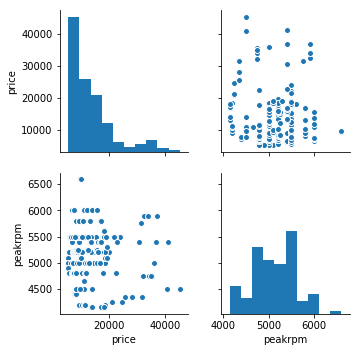

In [53]:
#draw pairplot for column peakrpm with price 

sns.pairplot(carprice[['price','peakrpm']])
plt.show()

### peakrpm data has broad peak in the distribution plot and we see high variance in the pairplot with price variable (data is too scattered)

In [54]:
#citympg: Mileage in city (Numeric)

carprice['citympg'].describe()

count   205.00
mean     25.22
std       6.54
min      13.00
25%      19.00
50%      24.00
75%      30.00
max      49.00
Name: citympg, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


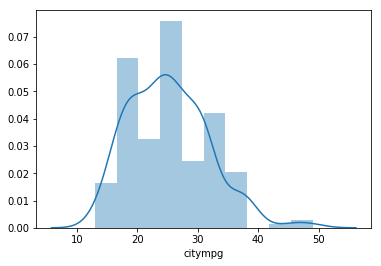

In [55]:
#plot distribution plot for column citympg

sns.distplot(carprice['citympg'])

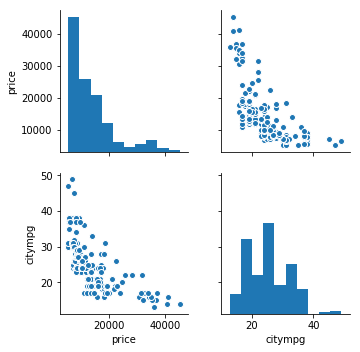

In [56]:
#draw pairplot for column citympg with price 

sns.pairplot(carprice[['price','citympg']])
plt.show()

### citympg data is quite normal with little longer right arm in the distribution plot and we see a good linear correlation with price in general (price decreases when citympg increases)


In [57]:
#highwaympg: Mileage on highway (Numeric)

carprice['highwaympg'].describe()

count   205.00
mean     30.75
std       6.89
min      16.00
25%      25.00
50%      30.00
75%      34.00
max      54.00
Name: highwaympg, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


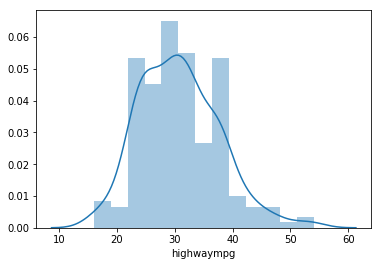

In [58]:
#plot distribution plot for column highwaympg

sns.distplot(carprice['highwaympg'])

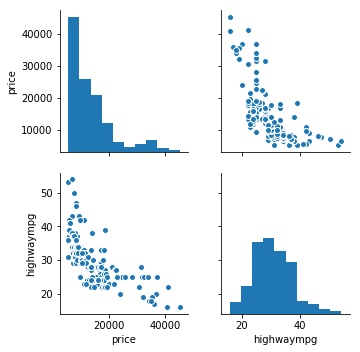

In [59]:
#draw pairplot for column highwaympg with price 

sns.pairplot(carprice[['price','highwaympg']])
plt.show()

### highwaympg data is quite normal with little longer right arm in the distribution plot and we see a good linear correlation with price in general (price decreases when highwaympg increases)

### Create a derived metric avgmpg, which is the mean of citympg and highwaympg

In [60]:
carprice['avgmpg'] = (carprice['citympg'] + carprice['highwaympg'] ) / 2
carprice['avgmpg'].describe()

count   205.00
mean     27.99
std       6.67
min      15.00
25%      22.50
50%      27.00
75%      32.00
max      51.50
Name: avgmpg, dtype: float64

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


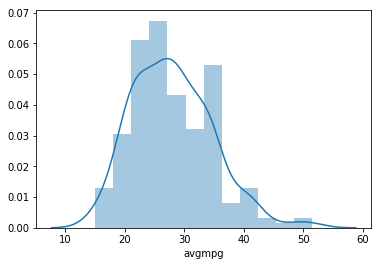

In [61]:
#plot distribution plot for derived column avgmpg

sns.distplot(carprice['avgmpg'])

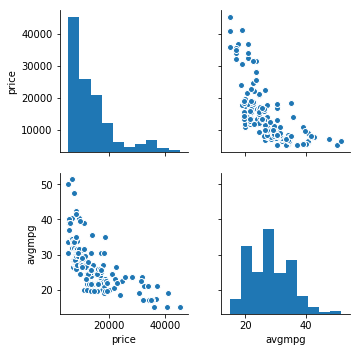

In [62]:
#draw pairplot for derived column avgmpg with price 

sns.pairplot(carprice[['price','avgmpg']])
plt.show()

### Derived metric avgmpg data is quite normal with little longer right arm in the distribution plot and we see a good linear correlation with price in general (price decreases when avgmpg increases)

### Step 3: Univariate Analysis - Categorical Variables

In [63]:
#carCompany: Name of car company (Categorical)

carprice['carCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [64]:
carprice.groupby(by='carCompany').price.mean().sort_values(ascending=False)

carCompany
JAGUAR        34600.00
BUICK         33647.00
PORSCHE       31400.50
BMW           26118.75
VOLVO         18063.18
AUDI          17859.17
MERCURY       16503.00
ALFA-ROMERO   15498.33
PEUGEOT       15489.09
SAAB          15223.33
MAZDA         10652.88
NISSAN        10415.67
VOLKSWAGEN    10077.50
TOYOTA         9885.81
RENAULT        9595.00
MITSUBISHI     9239.77
ISUZU          8916.50
SUBARU         8541.25
HONDA          8184.69
PLYMOUTH       7963.43
DODGE          7875.44
CHEVROLET      6007.00
Name: price, dtype: float64

### We can see that there comapnies which have very high mean car price and some with low mean car price. We see a corelation between car price and car brand companies . 

### Let's categorize car compnies in `luxury`, `semi-luxury` and `economy` categories based on the public information available on the internet and their car prices. Companies from the Luxury car category make the most expensive cars and companies from economy have the cheapest cars. Companies from the semi-luxury category have the car prices in the middle.

#### Luxury car companies - JAGUAR, BUICK, PORSCHE, BMW, VOLVO, AUDI 
#### Semi-luxury car caompanies - MERCURY, ALFA-ROMERO, PEUGEOT, SAAB
#### Economy car companies - MAZDA, NISSAN, VOLKSWAGEN, TOYOTA, RENAULT, MITSUBISHI, ISUZU, SUBARU, HONDA,  PLYMOUTH, DODGE, CHEVROLET 

In [65]:
def carCompanyMap(x):
    return x.map({"JAGUAR":"Luxury","BUICK":"Luxury","PORSCHE":"Luxury","BMW":"Luxury","VOLVO":"Luxury","AUDI":"Luxury",
          "MERCURY":"Semi-Luxury","ALFA-ROMERO":"Semi-Luxury","PEUGEOT":"Semi-Luxury","SAAB":"Semi-Luxury",
          "MAZDA":"Economy","NISSAN":"Economy","VOLKSWAGEN":"Economy","TOYOTA":"Economy","RENAULT":"Economy",
           "MITSUBISHI":"Economy","ISUZU":"Economy","SUBARU":"Economy","HONDA":"Economy","PLYMOUTH":"Economy",
           "DODGE":"Economy","CHEVROLET":"Economy"})
varlist =  ['carCompany']
carprice[varlist] = carprice[varlist].apply(carCompanyMap)

In [66]:
carprice['carCompany'].unique()

array(['Semi-Luxury', 'Luxury', 'Economy'], dtype=object)

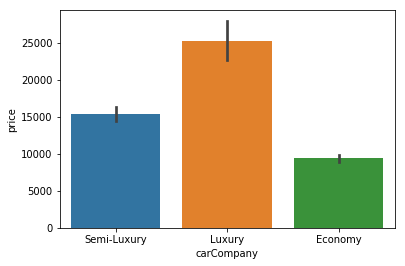

In [67]:
sns.barplot(x='carCompany',y='price',data=carprice)

In [68]:
# Get the dummy variables for the feature 'carCompany' and store it in a new variable - 'brand'
brand = pd.get_dummies(carprice['carCompany'])

In [69]:
brand.head()

,Economy,Luxury,Semi-Luxury
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [70]:
# drop the first column from brand using 'drop_first = True'

brand = pd.get_dummies(carprice['carCompany'], drop_first = True)

In [71]:
brand.head()

,Luxury,Semi-Luxury
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [72]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, brand], axis = 1)

In [73]:
#Now drop the variable carCompany

carprice.drop('carCompany', axis=1, inplace=True)

In [74]:
#fueltype: Car fuel type i.e gas or diesel (Categorical)

carprice['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [75]:
carprice.groupby(by='fueltype')['car_ID'].count()

fueltype
diesel     20
gas       185
Name: car_ID, dtype: int64

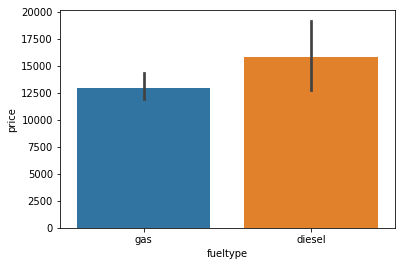

In [76]:
sns.barplot(x='fueltype',y='price',data=carprice)

### Diesel cars are more expensive

In [77]:
# Change fueltype variable to numeric values, where gas =1 and diesel = 0


# Defining the map function
def fueltype_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the fueltype
carprice[['fueltype']] = carprice[['fueltype']].apply(fueltype_map)

In [78]:
carprice['fueltype'].unique()

array([1, 0], dtype=int64)

In [79]:
#aspiration: Aspiration used in a car (Categorical)

carprice['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [80]:
carprice.groupby(by='aspiration')['car_ID'].count()

aspiration
std      168
turbo     37
Name: car_ID, dtype: int64

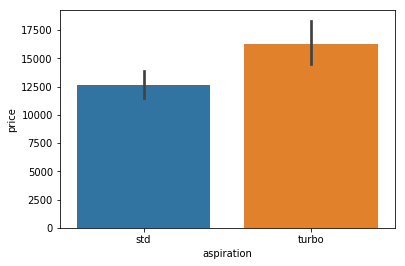

In [81]:
sns.barplot(x='aspiration',y='price',data=carprice)

### Cars with turbo aspiration have greater mean price

In [82]:
# Change aspiration variable to numeric values, where std =1 and turbo = 0


# Defining the map function
def aspiration_map(x):
    return x.map({'std': 1, "turbo": 0})

# Applying the function to the aspiration
carprice[['aspiration']] = carprice[['aspiration']].apply(aspiration_map)

carprice['fueltype'].unique()

array([1, 0], dtype=int64)

In [83]:
#doornumber: Number of doors in a car (Categorical)

carprice['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [84]:
carprice.groupby(by='doornumber')['car_ID'].count()

doornumber
four    115
two      90
Name: car_ID, dtype: int64

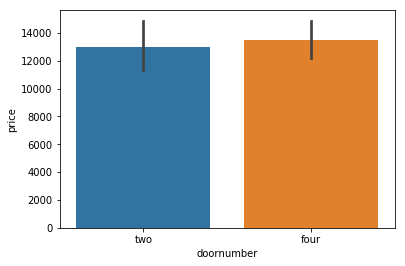

In [85]:
sns.barplot(x='doornumber',y='price',data=carprice)

### doornumber variable alone doesn't have significance on the car price

In [86]:
# Change doornumber variable to numeric values, where four =1 and two = 0


# Defining the map function
def doornumber_map(x):
    return x.map({'four': 1, "two": 0})

# Applying the function to the doornumber
carprice[['doornumber']] = carprice[['doornumber']].apply(doornumber_map)

carprice['doornumber'].unique()

array([0, 1], dtype=int64)

In [87]:
#carbody: body of car (Categorical)

carprice['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [88]:
carprice.groupby(by='carbody')['car_ID'].count()

carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: car_ID, dtype: int64

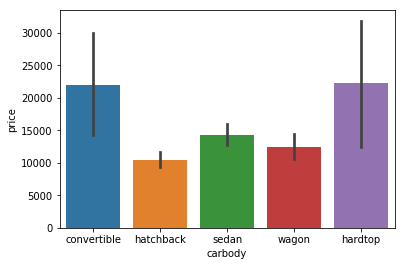

In [89]:
sns.barplot(x='carbody',y='price',data=carprice)

### Convertible and hartop cars are the most expensive ones and cars with a hatchback are the least expensive ones

In [90]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'carbody_dummy'

carbody_dummy = pd.get_dummies(carprice['carbody'])

In [91]:
carbody_dummy.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [92]:
# drop the first column from carbody_dummy using 'drop_first = True'

carbody_dummy = pd.get_dummies(carprice['carbody'], drop_first = True)

carbody_dummy.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [93]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, carbody_dummy], axis = 1)

In [94]:
#Now drop the column carbody

carprice.drop('carbody',axis=1,inplace=True)

In [95]:
#drivewheel: type of drive wheel (Categorical)

carprice['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [96]:
carprice.groupby(by='drivewheel')['car_ID'].count()

drivewheel
4wd      9
fwd    120
rwd     76
Name: car_ID, dtype: int64

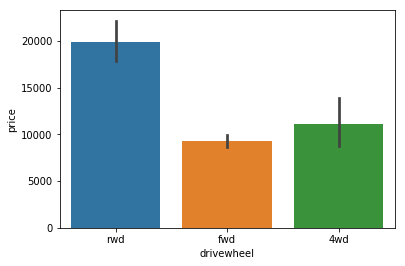

In [97]:
sns.barplot(x='drivewheel',y='price',data=carprice)

### The cars with rear wheel drive are the most expensive ones and the cars with forward wheel drive are the least expensive ones

In [98]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel_dummy'

drivewheel_dummy = pd.get_dummies(carprice['drivewheel'])
drivewheel_dummy.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [99]:
# drop the first column from drivewheel_dummy using 'drop_first = True'

drivewheel_dummy = pd.get_dummies(carprice['drivewheel'], drop_first = True)

drivewheel_dummy.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [100]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, drivewheel_dummy], axis = 1)

In [101]:
#Now drop the column drivewheel

carprice.drop('drivewheel',axis=1,inplace=True)

In [102]:
#enginelocation: Location of car engine (Categorical)

carprice['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [103]:
carprice.groupby(by='enginelocation')['car_ID'].count()

enginelocation
front    202
rear       3
Name: car_ID, dtype: int64

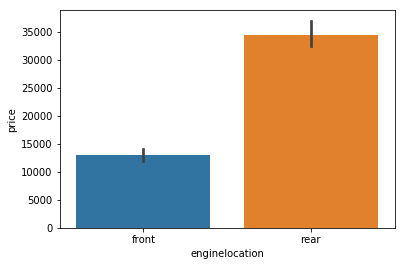

In [104]:
sns.barplot(x='enginelocation',y='price',data=carprice)

### Cars with engines in the rear have more than double mean car price than cars with the engines in the front. However, since enginelocation variable has 202 out of 205 rows with the value front, this variable is insignificant for the analysis and should be dropped

In [105]:
#drop enginelocation variable
carprice.drop('enginelocation',axis=1,inplace=True)

In [106]:
#enginetype: Type of engine. (Categorical)

carprice['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [107]:
carprice.groupby(by='enginetype')['car_ID'].count()

enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: car_ID, dtype: int64

In [108]:
#There is one record with enginetype value = dohcv. By a quick glance on the data, this egnine type is for car - porsche cayenne
#However, there is no enginetype dohcv. car porsche cayenne has enginetype dohc. This is a data entry issue. Let's replace this 
#enginetype value to dohcv

carprice['enginetype'] = carprice['enginetype'].apply(lambda x: 'dohc' if x == 'dohcv' else x)  

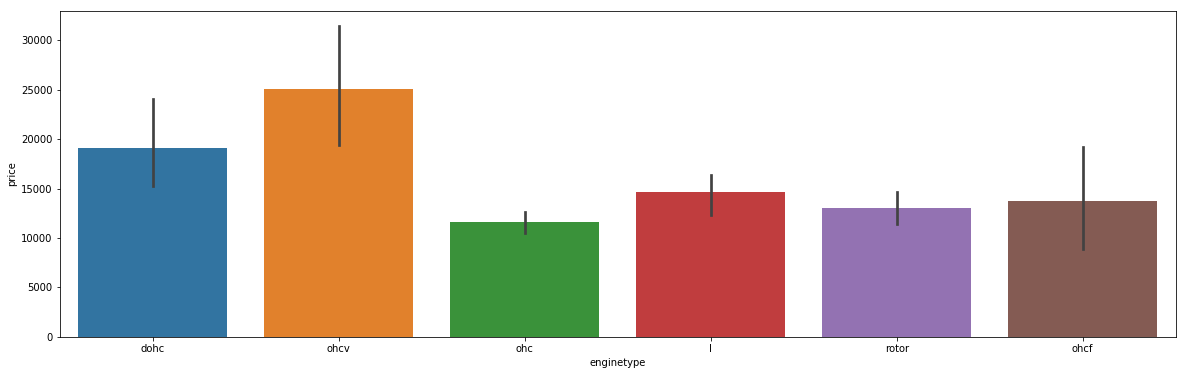

In [109]:
#Draw the barplot of enginetype against mean value of carprice

plt.figure(figsize=(20, 6))
sns.barplot(x='enginetype',y='price',estimator=np.mean,data=carprice)

### engine type ohcv has the highest mean car prices and ohc has the lowest mean car prices

In [110]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetype_dummy'

enginetype_dummy = pd.get_dummies(carprice['enginetype'])

In [111]:
enginetype_dummy.head()

,dohc,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [112]:
# drop the column rotor from enginetype_dummy as only 4 rows have this value

enginetype_dummy.drop('rotor',axis=1,inplace=True)

In [113]:
enginetype_dummy.head()

,dohc,l,ohc,ohcf,ohcv
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [114]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, enginetype_dummy], axis = 1)

In [115]:
#Now drop the column enginetype

carprice.drop('enginetype',axis=1,inplace=True)

In [116]:
#cylindernumber: cylinder placed in the car (Categorical)

carprice['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [117]:
# Change cylindernumber variable to numeric values


# Defining the map function
def cylindernumber_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to carprice
carprice[['cylindernumber']] = carprice[['cylindernumber']].apply(cylindernumber_map)

carprice['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [118]:
carprice.groupby(by='cylindernumber')['car_ID'].count()

cylindernumber
2       4
3       1
4     159
5      11
6      24
8       5
12      1
Name: car_ID, dtype: int64

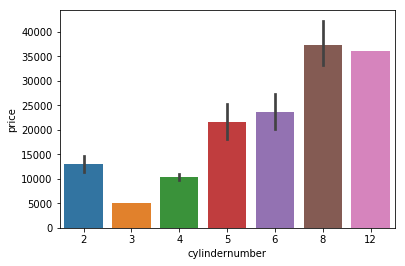

In [119]:
sns.barplot(x='cylindernumber',y='price',data=carprice)

### We can see that the car mean price is generally increasing with the number of cylinders. Majority of the cars have 4 cylinders.

In [120]:
#fuelsystem: Fuel system of car (Categorical)

carprice['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [121]:
carprice.groupby(by='fuelsystem')['car_ID'].count()

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: car_ID, dtype: int64

In [122]:
#By a quick search, mfi and mpfi are same fuel system types, similarly spdi and spfi are same
#Replace mfi with mpfi and spfi with spdi

carprice['fuelsystem'] = carprice['fuelsystem'].apply(lambda x: 'mpfi' if x == 'mfi' else 'spdi' if x == 'spfi' else x)  

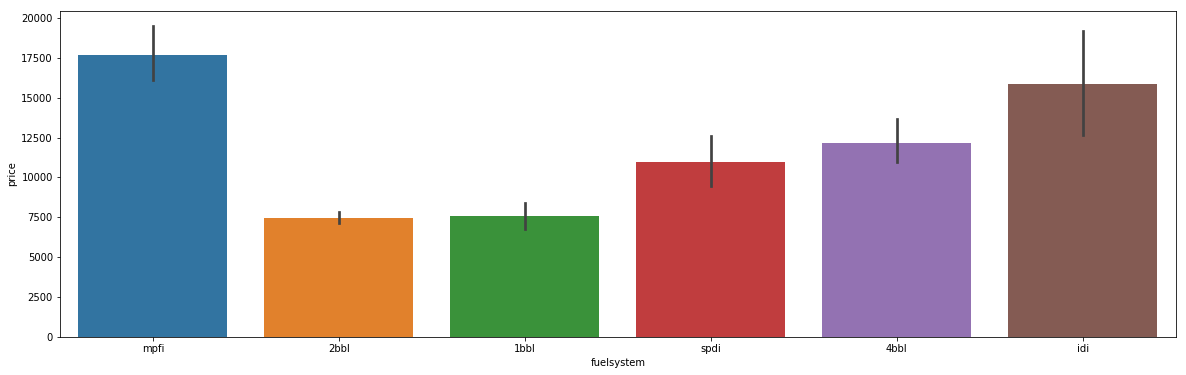

In [123]:
#Draw the barplot of fuelsystem against mean value of carprice

plt.figure(figsize=(20, 6))
sns.barplot(x='fuelsystem',y='price',estimator=np.mean,data=carprice)

### Cars with fuel system type mpfi have the highest mean price and this is the most popular fuel system in the cars. Cars with fuel system type 2bbl and 1bbl have the lowest mean price.

In [124]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuelsystem_dummy'
#Drop the first dummy column

fuelsystem_dummy = pd.get_dummies(carprice['fuelsystem'], drop_first=True)

In [125]:
fuelsystem_dummy.head()

,2bbl,4bbl,idi,mpfi,spdi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [126]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, fuelsystem_dummy], axis = 1)

In [127]:
#Now drop the column fuelsystem

carprice.drop('fuelsystem',axis=1,inplace=True)

In [128]:
# Now look at the car_ID column - Unique id of each observation (Interger)
carprice['car_ID'].head()

0    1
1    2
2    3
3    4
4    5
Name: car_ID, dtype: int64

In [129]:
carprice['car_ID'].describe()

count   205.00
mean    103.00
std      59.32
min       1.00
25%      52.00
50%     103.00
75%     154.00
max     205.00
Name: car_ID, dtype: float64

In [130]:
# drop car_ID column as it is just a unique id and not useful for the analysis

carprice.drop('car_ID', axis = 1, inplace=True)

In [131]:
#check the final carprice dataframe

carprice.shape

(205, 37)

In [132]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
wheelbase           205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
cararea             205 non-null float64
avgmpg              205 non-null float64
Luxury              205 non-null uint8
Semi-Luxury         205 non-null uint8
hardtop             205 non-null uint8
hatchback           2

In [133]:
carprice.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carheight,curbweight,cylindernumber,enginesize,boreratio,...,dohc,l,ohc,ohcf,ohcv,2bbl,4bbl,idi,mpfi,spdi
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,...,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,0.90,0.82,0.56,98.76,53.72,2555.57,4.38,126.91,3.33,...,0.06,0.06,0.72,0.07,0.06,0.32,0.01,0.10,0.46,0.05
std,1.25,0.30,0.39,0.50,6.02,2.44,520.68,1.08,41.64,0.27,...,0.24,0.24,0.45,0.26,0.24,0.47,0.12,0.30,0.50,0.22
min,-2.00,0.00,0.00,0.00,86.60,47.80,1488.00,2.00,61.00,2.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,0.00,94.50,52.00,2145.00,4.00,97.00,3.15,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,97.00,54.10,2414.00,4.00,120.00,3.31,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,1.00,1.00,1.00,102.40,55.50,2935.00,4.00,141.00,3.58,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
max,3.00,1.00,1.00,1.00,120.90,59.80,4066.00,12.00,326.00,3.94,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Step 4: Bivariate analysis 

### Create correlation heatmap to see which variables are highly correlated

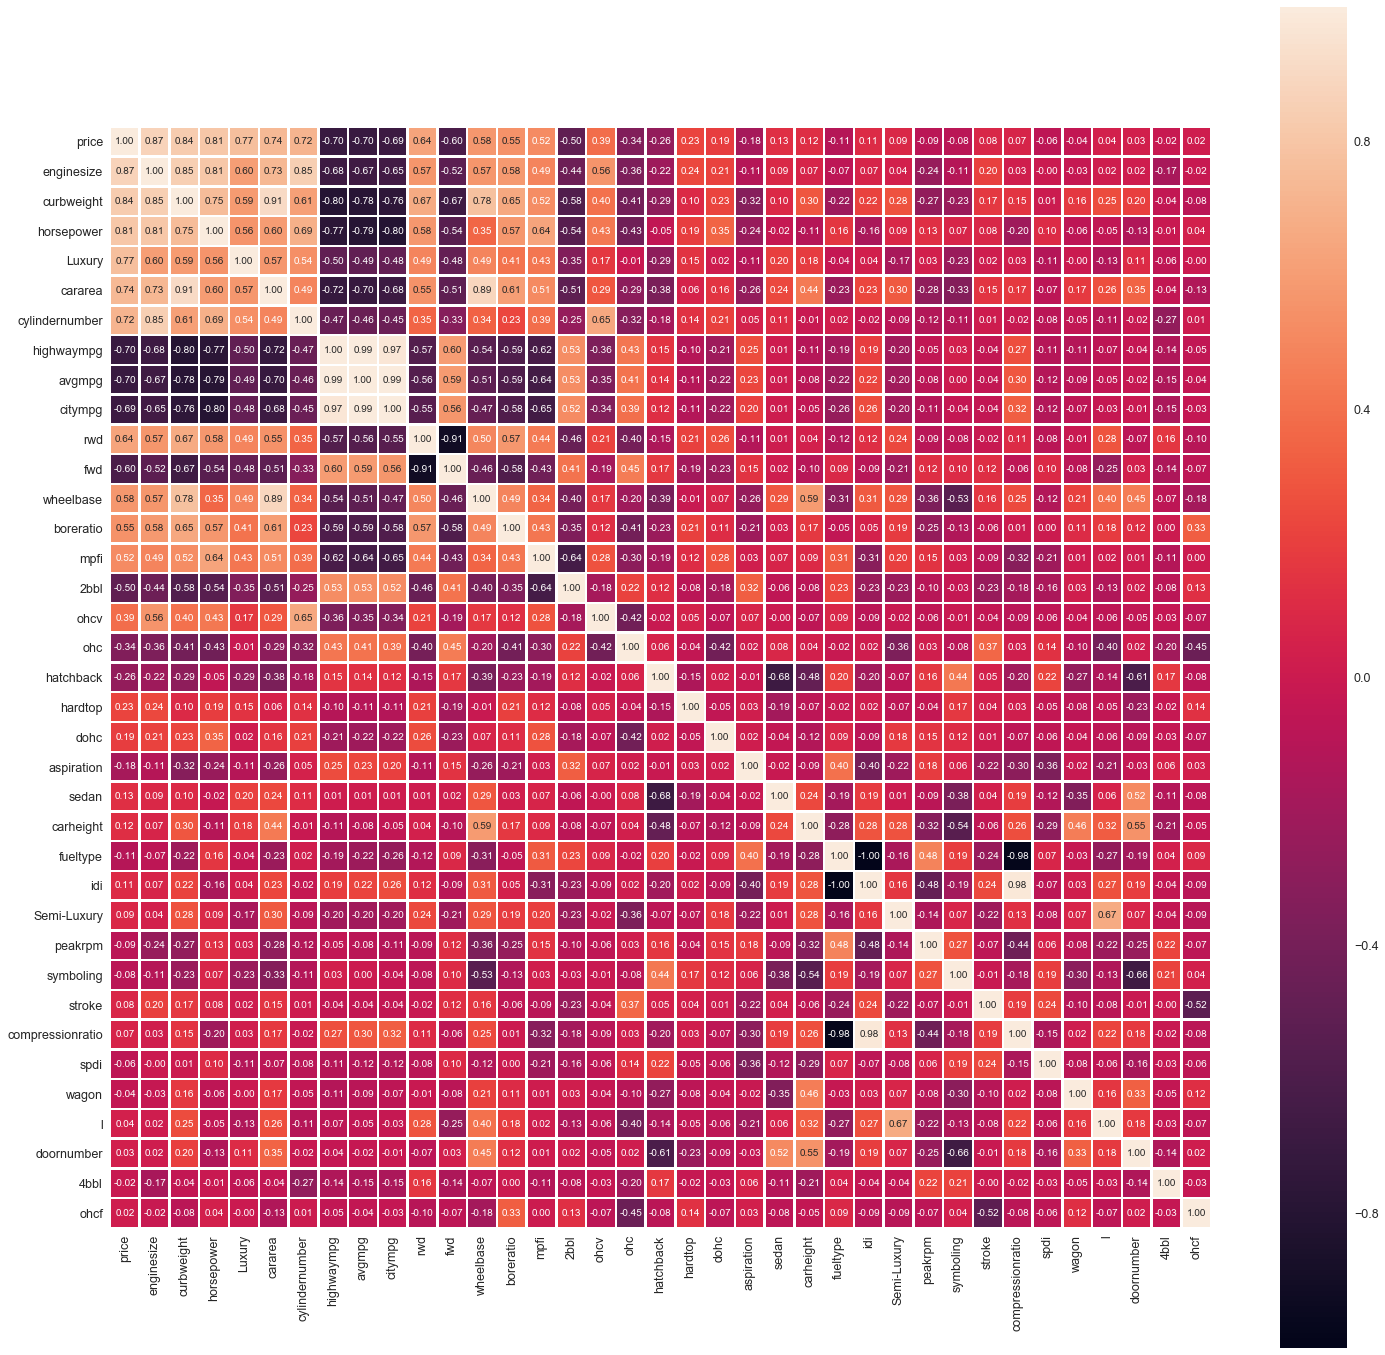

In [134]:
corr = carprice.corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(len(carprice.columns), 'price')['price'].index
cm = np.corrcoef(carprice[cols].values.T)

plt.figure(figsize=(len(carprice.columns)/1.5, len(carprice.columns)/1.5))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
plt.show()


### Top ten variables having strong correlation with car price:

#### enginesize -> 0.87
#### curbweight -> 0.84
#### horsepower -> 0.81
#### Luxury -> 0.77
#### cararea -> 0.74
#### cylindernumber -> 0.72
#### highwaympg -> -0.70
#### avgmpg -> -0.70
#### citympg -> -0.69
#### rwd -> 0.64

### We also see that these variables also have strong correlation with other variables. Some of the examples of bivariate correlations are:

#### enginesize has strong correlation with curbweight, horsepower, cararea and cylindernumber variables
#### curbweight has strong correlation with enginesize, horsepower, cararea and highwaympg variables
#### horsepower has strong correlation with enginesize, curbweight and highwaympg variables
#### Luxury variable doesn't have a very high correlation with any other variable
#### cararea has strong correlation with wheelbase, enginesize, curbweight and highwaympg variables 
#### cylindernumber has strong correlation with enginesize variable
#### highwaympg has strong correlation with avgmpg, citympg, curbweight and horsepower variables

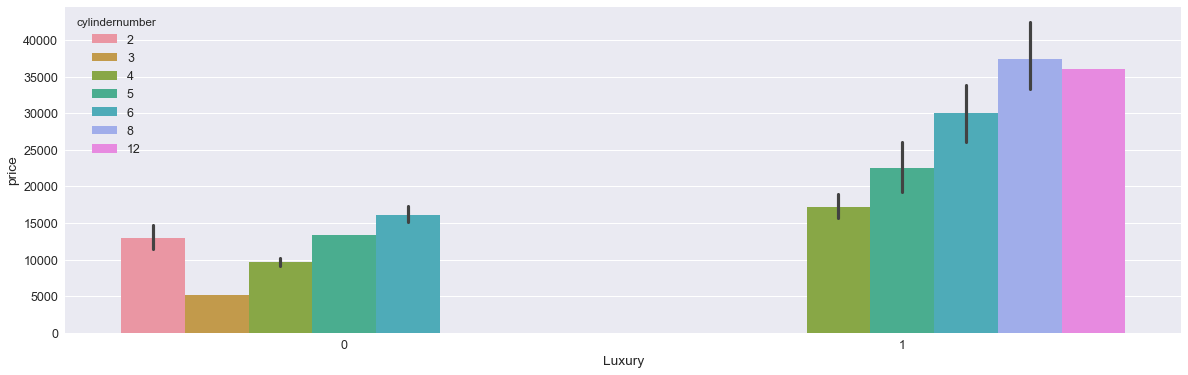

In [135]:
#Bivariate analysis of derived variable Luxury and cylindernumber against price
#Draw the barplot

plt.figure(figsize=(20, 6))
sns.barplot(x='Luxury',y='price',hue='cylindernumber',estimator=np.mean,data=carprice)

### Luxury cars have higher mean car prices across all cylinder numbers
### Non-Luxury cars don't have eight or tweleve cylinders
### Luxury cars don't have two or three cylinders

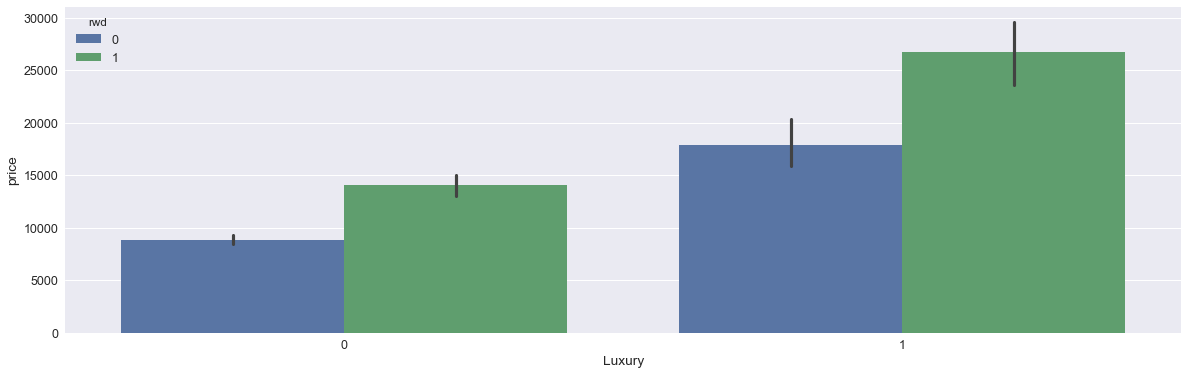

In [136]:
#Bivariate analysis of derived variable Luxury and rwd against price
#Draw the barplot

plt.figure(figsize=(20, 6))
sns.barplot(x='Luxury',y='price',hue='rwd',estimator=np.mean,data=carprice)

### Rear wheel drive cars have higher mean price in both luxury and non-luxury segments
### Luxury cars have higher mean price in both rear wheel drive and non-rear wheel drive segments

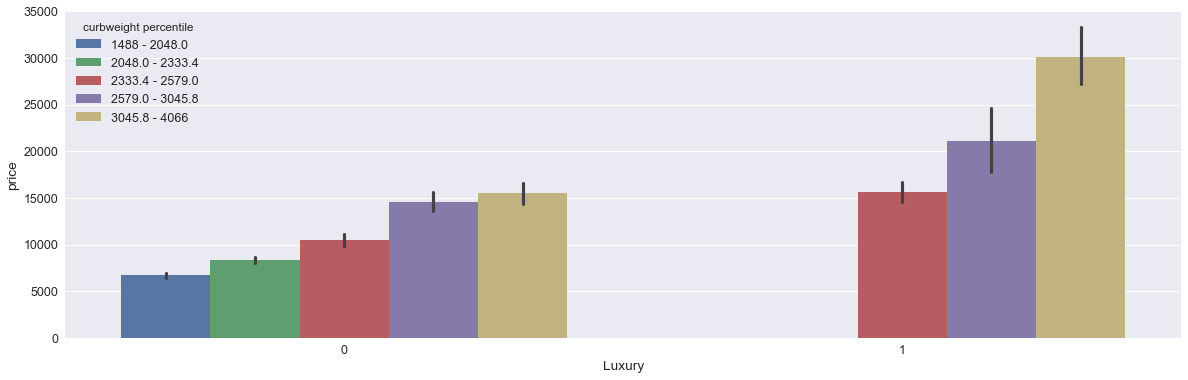

In [137]:
#Categorize curbweight into 5 quantiles and compare it along with luxury against price
col = "curbweight"
minimum = round(min(carprice[col]),2)
p1 = np.percentile(carprice[col],20).round(2)
p2 = np.percentile(carprice[col],40).round(2)
p3 = np.percentile(carprice[col],60).round(2)
p4 = np.percentile(carprice[col],80).round(2)
maximum = round(max(carprice[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(carprice.index):
    if carprice[col][i] >= minimum and carprice[col][i] <= p1:
        quintile += [valuelist[0]]
    elif carprice[col][i] > p1 and carprice[col][i] <= p2:
        quintile += [valuelist[1]]
    elif carprice[col][i] > p2 and carprice[col][i] <= p3:
        quintile += [valuelist[2]]
    elif carprice[col][i] > p3 and carprice[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]

name = col+" "+"percentile"        
carprice[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='Luxury',y='price',hue=name,hue_order=valuelist,estimator=np.mean,data=carprice)


### Cars with higher curb weights have higher mean price in both luxury and non-luxury segments
### Luxury cars are not present in the first two percentiles of the curb weights. Therefore, luxury cars have  comparitvely higher curb weights

In [138]:
#drop the new percentile column now
carprice.drop(name,axis=1,inplace=True)

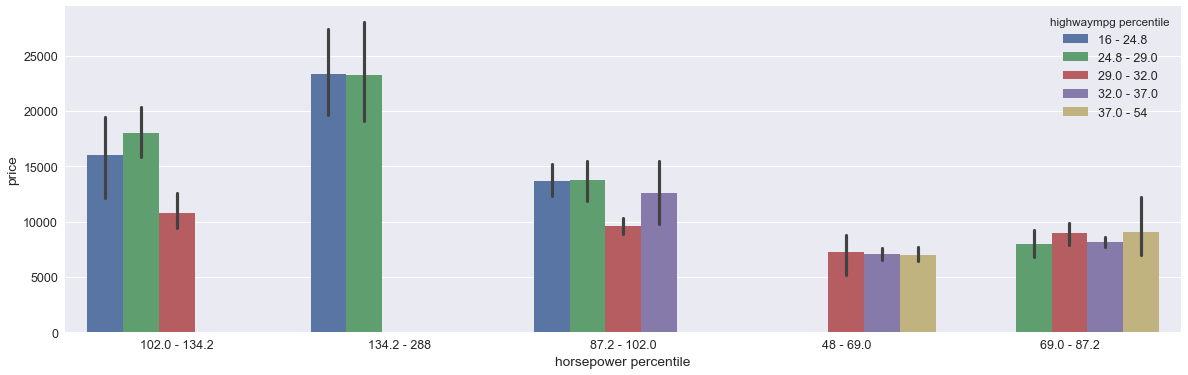

In [139]:
#Categorize horsepower and highwaympg into 5 quantiles each and compare them against price
col1 = "horsepower"
minimum = round(min(carprice[col1]),2)
p1 = np.percentile(carprice[col1],20).round(2)
p2 = np.percentile(carprice[col1],40).round(2)
p3 = np.percentile(carprice[col1],60).round(2)
p4 = np.percentile(carprice[col1],80).round(2)
maximum = round(max(carprice[col1]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(carprice.index):
    if carprice[col1][i] >= minimum and carprice[col1][i] <= p1:
        quintile += [valuelist[0]]
    elif carprice[col1][i] > p1 and carprice[col1][i] <= p2:
        quintile += [valuelist[1]]
    elif carprice[col1][i] > p2 and carprice[col1][i] <= p3:
        quintile += [valuelist[2]]
    elif carprice[col1][i] > p3 and carprice[col1][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name1 = col1+" "+"percentile"
carprice[name1] = pd.Series(quintile)

col2 = "highwaympg"
minimum = round(min(carprice[col2]),2)
p1 = np.percentile(carprice[col2],20).round(2)
p2 = np.percentile(carprice[col2],40).round(2)
p3 = np.percentile(carprice[col2],60).round(2)
p4 = np.percentile(carprice[col2],80).round(2)
maximum = round(max(carprice[col2]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist1 = []
for x in range(len(values)-1):
    valuelist1 += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(carprice.index):
    if carprice[col2][i] >= minimum and carprice[col2][i] <= p1:
        quintile += [valuelist1[0]]
    elif carprice[col2][i] > p1 and carprice[col2][i] <= p2:
        quintile += [valuelist1[1]]
    elif carprice[col2][i] > p2 and carprice[col2][i] <= p3:
        quintile += [valuelist1[2]]
    elif carprice[col2][i] > p3 and carprice[col2][i] <= p4:
        quintile += [valuelist1[3]]
    else:
        quintile += [valuelist1[4]]
name2 = col2+" "+"percentile"
carprice[name2] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x=name1,y='price',hue=name2,hue_order=valuelist1,estimator=np.mean,data=carprice)


### Cars with lower horsepower have higher highway mpg values. These cars are less expensive too.
### Cars with higher horsepower have lower highway mpg values. These care are most expensive.

In [140]:
#drop the new percentile columns now
carprice.drop(name1,axis=1,inplace=True)
carprice.drop(name2,axis=1,inplace=True)

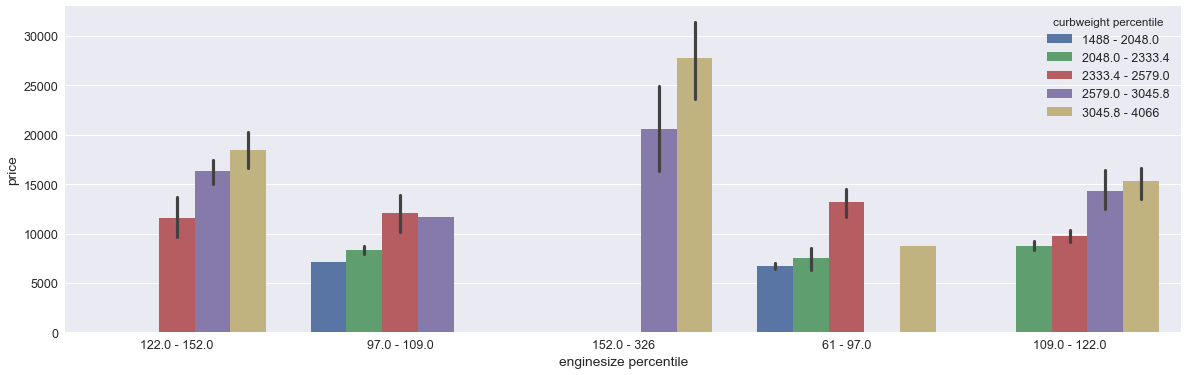

In [141]:
#Categorize enginesize and curbweight into 5 quantiles each and compare them against price
col1 = "enginesize"
minimum = round(min(carprice[col1]),2)
p1 = np.percentile(carprice[col1],20).round(2)
p2 = np.percentile(carprice[col1],40).round(2)
p3 = np.percentile(carprice[col1],60).round(2)
p4 = np.percentile(carprice[col1],80).round(2)
maximum = round(max(carprice[col1]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(carprice.index):
    if carprice[col1][i] >= minimum and carprice[col1][i] <= p1:
        quintile += [valuelist[0]]
    elif carprice[col1][i] > p1 and carprice[col1][i] <= p2:
        quintile += [valuelist[1]]
    elif carprice[col1][i] > p2 and carprice[col1][i] <= p3:
        quintile += [valuelist[2]]
    elif carprice[col1][i] > p3 and carprice[col1][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name1 = col1+" "+"percentile"
carprice[name1] = pd.Series(quintile)

col2 = "curbweight"
minimum = round(min(carprice[col2]),2)
p1 = np.percentile(carprice[col2],20).round(2)
p2 = np.percentile(carprice[col2],40).round(2)
p3 = np.percentile(carprice[col2],60).round(2)
p4 = np.percentile(carprice[col2],80).round(2)
maximum = round(max(carprice[col2]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist1 = []
for x in range(len(values)-1):
    valuelist1 += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(carprice.index):
    if carprice[col2][i] >= minimum and carprice[col2][i] <= p1:
        quintile += [valuelist1[0]]
    elif carprice[col2][i] > p1 and carprice[col2][i] <= p2:
        quintile += [valuelist1[1]]
    elif carprice[col2][i] > p2 and carprice[col2][i] <= p3:
        quintile += [valuelist1[2]]
    elif carprice[col2][i] > p3 and carprice[col2][i] <= p4:
        quintile += [valuelist1[3]]
    else:
        quintile += [valuelist1[4]]
name2 = col2+" "+"percentile"
carprice[name2] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x=name1,y='price',hue=name2,hue_order=valuelist1,estimator=np.mean,data=carprice)


### Cars with greater engine size have higher curb weights. These cars are more expensive too.

In [142]:
#drop the new percentile columns now
carprice.drop(name1,axis=1,inplace=True)
carprice.drop(name2,axis=1,inplace=True)

## Linear Regression Model Creation

### Step 5: Splitting the Data into Training and Testing Sets

In [143]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescale the train set variables using min-max scaling (normalization)

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler = MinMaxScaler()

In [146]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'cararea', 'avgmpg', 'Luxury', 'Semi-Luxury',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohc', 'l',
       'ohc', 'ohcf', 'ohcv', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [147]:
#Apply scaling to all numerical variables fn the train set except the ones which have binary values 0 and 1 

num_vars = ['symboling','wheelbase','carheight','curbweight','cylindernumber','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','cararea','avgmpg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [148]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carheight,curbweight,cylindernumber,enginesize,boreratio,...,dohc,l,ohc,ohcf,ohcv,2bbl,4bbl,idi,mpfi,spdi
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.56,0.91,0.82,0.56,0.41,0.51,0.41,0.24,0.24,0.50,...,0.08,0.06,0.69,0.08,0.06,0.35,0.02,0.09,0.44,0.04
std,0.24,0.29,0.39,0.50,0.21,0.22,0.21,0.12,0.15,0.21,...,0.27,0.24,0.47,0.28,0.24,0.48,0.14,0.29,0.50,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,1.00,1.00,0.00,0.27,0.35,0.25,0.20,0.14,0.31,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.60,1.00,1.00,1.00,0.34,0.52,0.36,0.20,0.18,0.50,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.60,1.00,1.00,1.00,0.50,0.67,0.56,0.20,0.30,0.68,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [149]:
#Divide into x and y for model building

y_train = df_train.pop('price')
X_train = df_train

### Step 5: Building a linear model

In [150]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [151]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#Run RFE (Recursive Feature Elimination)
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [152]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 17),
 ('fueltype', False, 14),
 ('aspiration', False, 23),
 ('doornumber', False, 24),
 ('wheelbase', False, 12),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', False, 18),
 ('citympg', False, 13),
 ('highwaympg', True, 1),
 ('cararea', False, 5),
 ('avgmpg', False, 16),
 ('Luxury', True, 1),
 ('Semi-Luxury', False, 21),
 ('hardtop', False, 9),
 ('hatchback', False, 7),
 ('sedan', False, 8),
 ('wagon', False, 6),
 ('fwd', False, 25),
 ('rwd', False, 20),
 ('dohc', True, 1),
 ('l', False, 3),
 ('ohc', False, 2),
 ('ohcf', False, 4),
 ('ohcv', True, 1),
 ('2bbl', False, 27),
 ('4bbl', False, 26),
 ('idi', False, 10),
 ('mpfi', False, 22),
 ('spdi', False, 15)]

In [153]:
#RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'highwaympg', 'Luxury', 'dohc', 'ohcv'],
      dtype='object')

In [154]:
#Columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'compressionratio', 'peakrpm', 'citympg', 'cararea',
       'avgmpg', 'Semi-Luxury', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcf', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi'],
      dtype='object')

### Now use statsmodel to see the detailed statistics of the model

In [155]:
# Create X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [156]:
# Add a constant variable. Need to do this as the regression line from statsmodel passes through 0 by default  

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [157]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [158]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.93e-64
Time:                        10:05:51   Log-Likelihood:                 189.59
No. Observations:                 143   AIC:                            -357.2
Df Residuals:                     132   BIC:                            -324.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1414      0.067      2.

In [159]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,43.73
1,cylindernumber,38.84
0,curbweight,28.79
3,boreratio,17.81
4,stroke,17.74
5,horsepower,15.87
6,highwaympg,15.77
7,Luxury,2.85
9,ohcv,2.52
8,dohc,1.87


### We got good adjusted R-squared value of 0.904 and negative AIC and BIC values. p-value of variable dohc is 0.066, which is greater than 0.05, so it is insignificant (in the presence of other variables). There are some variables with high VIF values, so these variables have high correlation with other variables. Let's drop the insignificant variable dohc first and create the model again.

In [160]:
X_train_rfe_new = X_train_rfe.copy()
X_train_rfe_new.drop(["dohc"], axis = 1, inplace = True)

### Rebuild the model without dohc

In [161]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [162]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [163]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.70e-64
Time:                        10:06:06   Log-Likelihood:                 187.75
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     133   BIC:                            -325.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1265      0.067      1.

In [164]:
# Calculate the VIFs for the model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,41.25
1,cylindernumber,38.56
0,curbweight,28.44
4,stroke,16.46
3,boreratio,16.19
6,highwaympg,15.52
5,horsepower,13.37
7,Luxury,2.42
8,ohcv,1.98


### Adjusted R-squared value dropped from 0.904 to 0.902, which is a very minor difference. The changes in AIC and BIC values are also very minor. Therefore, dropping variable dohc didn't impact the model. p-value of variable ohcv has increased to 0.162 now. Let's drop this insignificant variable and create the model again.

In [165]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["ohcv"], axis = 1, inplace = True)

### Rebuild the model without ohcv

In [166]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [167]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [168]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.41e-65
Time:                        10:06:07   Log-Likelihood:                 186.69
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     134   BIC:                            -328.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1148      0.067      1.

In [169]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,40.59
1,cylindernumber,36.35
0,curbweight,28.39
4,stroke,15.85
3,boreratio,15.74
6,highwaympg,15.41
5,horsepower,13.37
7,Luxury,2.18


### Adjusted R-squared value dropped from 0.902 to 0.901, which is a very minor difference. The changes in AIC and BIC values are also very minor. Therefore, dropping variable ohcv didn't impact the model. p-values of all variables are now less than 0.05. There are some variables with high VIF values. Variables with value greater than 5 have strong correlation with other variables. Variable enginesize has the highest VIF value (40.59). Let's drop this variable and rebuild the model

### Rebuild the model without enginesize

In [170]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["enginesize"], axis = 1, inplace = True)

In [171]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [172]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [173]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.60e-61
Time:                        10:06:09   Log-Likelihood:                 173.09
No. Observations:                 143   AIC:                            -330.2
Df Residuals:                     135   BIC:                            -306.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1548      0.047     -3.

In [174]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,26.82
1,cylindernumber,17.39
3,stroke,14.49
2,boreratio,14.05
4,horsepower,13.30
5,highwaympg,11.59
6,Luxury,2.15


### Adjusted R-squared value dropped from 0.901 to 0.882, which is a minor difference. The changes in AIC and BIC values are also very minor. Therefore, dropping variable enginesize didn't have a big impact on the model. p-value of few variables has increased now and they have become inginificant in the presence of other variables. p-value of variable stroke is 0.834, which is highest. Let's drop this insignificant variable and create the model again.

### Rebuild the model without stroke

In [175]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["stroke"], axis = 1, inplace = True)

In [176]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [177]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [178]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.5
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           6.30e-62
Time:                        10:06:10   Log-Likelihood:                 173.07
No. Observations:                 143   AIC:                            -332.1
Df Residuals:                     136   BIC:                            -311.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.042     -3.

In [179]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,17.09
1,cylindernumber,15.68
2,boreratio,12.34
3,horsepower,11.97
4,highwaympg,5.01
5,Luxury,2.15


### Adjusted R-squared value remained same 0.882. The changes in AIC and BIC values are also very minor. Therefore, dropping variable stroke didn't have a big impact on the model. There are still couple of variables with high p-values. p-value of variable boreratio is 0.776, which is highest. Let's drop this insignificant variable and create the model again.

### Rebuild the model without boreratio

In [180]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["boreratio"], axis = 1, inplace = True)

In [181]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [182]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [183]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           4.24e-63
Time:                        10:06:11   Log-Likelihood:                 173.02
No. Observations:                 143   AIC:                            -334.0
Df Residuals:                     137   BIC:                            -316.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1628      0.040     -4.

In [184]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,cylindernumber,13.24
2,horsepower,10.39
0,curbweight,9.95
3,highwaympg,3.22
4,Luxury,2.14


### Adjusted R-squared value increased from 0.882 to 0.883. AIC and BIC values have also reduced. Therefore, dropping variable boreratio improved the model fit. p-value of variable cylindernumber is 0.542, which is insignificant value. This variable also has the highest VIF value. Let's drop this insignificant variable and create the model again.

### Rebuild the model without cylindernumber

In [185]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["cylindernumber"], axis = 1, inplace = True)

In [186]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [187]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [188]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.91e-64
Time:                        10:06:12   Log-Likelihood:                 172.83
No. Observations:                 143   AIC:                            -335.7
Df Residuals:                     138   BIC:                            -320.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1640      0.040     -4.116      0.0

In [189]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,9.34
1,horsepower,7.27
3,Luxury,2.01
2,highwaympg,1.97


### Adjusted R-squared value increased from 0.882 to 0.884. AIC and BIC values have also reduced. Therefore, dropping variable cylindernumber improved the model fit. There are no variables with p-value greater than 0.05, so all variables are significant. Variable curbweight has VIF value of 9.34 and horsepower has VIF value of 7.27. Let's drop the variable curbweight and create the model again.

### Rebuild the model without curbweight

In [190]:
X_train_rfe = X_train_rfe_new.copy()
X_train_rfe_new.drop(["curbweight"], axis = 1, inplace = True)

In [191]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [192]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [193]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     208.1
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.39e-51
Time:                        10:06:13   Log-Likelihood:                 138.71
No. Observations:                 143   AIC:                            -269.4
Df Residuals:                     139   BIC:                            -257.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0749      0.038      1.960      0.0

### After dropping variable curbweight, adjusted R-squared value dropped from 0.884 to 0.814, AIC changed from -335.7 to -269.4, BIC changed from -320.8 to -257.6. These are major changes to the model fit parameters. Also, the p-value of highwaympg has now increased to 0.073. 

### Apparently, we shouldn't drop the variable curbweight as it is needed for the good model fit. We also know that curbweight is an important feature as it has high correlation with car price in the heatmap. 

### Let's reject this model and add the variable curbweight back. 

### Add variable curbweight back 

In [194]:
X_train_rfe_new = X_train_rfe.copy()

### Let's now drop the variable horsepower, which had the VIF value 7.27, and create the model again.

### Rebuild the model without horsepower

In [195]:
X_train_rfe_new.drop(["horsepower"], axis = 1, inplace = True)

In [196]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [197]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [198]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     269.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           9.39e-58
Time:                        10:06:15   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -300.5
Df Residuals:                     139   BIC:                            -288.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0717      0.042     -1.701      0.0

### After dropping variable horsepower, adjusted R-squared value dropped from 0.884 to 0.850, AIC changed from -335.7 to -300.5, BIC changed from -320.8 to -288.7. These are big changes to the model fit parameters. Also, the p-value of highwaympg has now increased to 0.877. 

### Apparently, we shouldn't drop the variable horsepower as it is needed for the good model fit. We also know that horsepower is an important feature as it has high correlation with car price in the heatmap. 

### Let's reject this model and add the variable horsepower back. 

### Add variable horsepower back

In [199]:
X_train_rfe_new = X_train_rfe.copy()

### Below are the final selected variables for the model

In [200]:
X_train_rfe_new.columns

Index(['curbweight', 'horsepower', 'highwaympg', 'Luxury'], dtype='object')

### Let's create the model again for these variables.

In [201]:
# Add a constant variable.

X_train_lm = sm.add_constant(X_train_rfe_new)

In [202]:
#Run the linear model

lm = sm.OLS(y_train,X_train_lm).fit()   

In [203]:
#Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.91e-64
Time:                        10:06:17   Log-Likelihood:                 172.83
No. Observations:                 143   AIC:                            -335.7
Df Residuals:                     138   BIC:                            -320.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1640      0.040     -4.116      0.0

In [204]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,9.34
1,horsepower,7.27
3,Luxury,2.01
2,highwaympg,1.97


### Step 6: Residual Analysis of the train data

### Let's check if the error terms are normally distributed. Plot the histogram of the error terms.

In [205]:
y_train_price = lm.predict(X_train_lm)

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

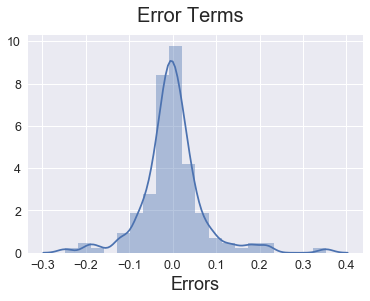

In [206]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### We can see the error terms are normally distributed around 0.0.

### Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [207]:
num_vars = ['symboling','wheelbase','carheight','curbweight','cylindernumber','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','cararea','avgmpg']

#Apply transform on the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [208]:
y_test = df_test.pop('price')
X_test = df_test

In [209]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [210]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Step 8: Model Evaluation

Text(0,0.5,'y_pred')

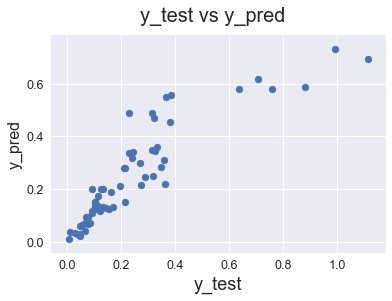

In [211]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The equation of our best fitted line is:

$ price = -0.164 + 0.496 \times curbweight + 0.405 \times horsepower + 0.131 \times highwaympg + 0.203 \times Luxury $

### R-squared score on the test set

In [212]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7952834125976829

### Root Mean Squared Error (RMSE) on the test set 

In [213]:
from sklearn.metrics import mean_squared_error
from math import sqrt

meanSquaredError=mean_squared_error(y_test, y_pred)
print("MSE:", round(meanSquaredError,2))
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", round(rootMeanSquaredError,2))

MSE: 0.01
RMSE: 0.1


## Conclusion:

### Based on our analysis, significant features which indicate the price of a car are below:

### `Brand`: Car company manufacturer. Cars from some manufacturers are more expensive compared to other manufacturers with the same other features.
### `Curb Weight`: The weight of a car without occupants or baggage. Cars with higher curb weight tend to have higher mean price.
### `Horsepower`: The maximum power output of the car engine. Cars with higher horsepower are more expensive.
### `Highway mpg`: Mileage on highway. There is a negative correlation between highway mileage and car price. Less expensive cars give higher highway mileage and are more fuel efficient.